In [3]:
# f1 = prepath+"logs_MUTAG_1/log_MUTAG.txt"
# f2 = prepath+"logs_MUTAG_2/log_MUTAG.txt"
# f3 = prepath+"logs_MUTAG_3/log_MUTAG.txt"
# f4 = prepath+"logs_MUTAG_4/log_MUTAG.txt"
# f5 = prepath+"logs_MUTAG_5/log_MUTAG.txt"


# f1 = prepath+"logs_PROTEINS_1/log_PROTEINS.txt"
# f2 = prepath+"logs_PROTEINS_2/log_PROTEINS.txt"
# f3 = prepath+"logs_PROTEINS_3/log_PROTEINS.txt"
# f4 = prepath+"logs_PROTEINS_4/log_PROTEINS.txt"
# f5 = prepath+"logs_PROTEINS_5/log_PROTEINS.txt"

f1 = prepath+"logs_NCI1_1/log_NCI1.txt"
f2 = prepath+"logs_NCI1_2/log_NCI1.txt"
f3 = prepath+"logs_NCI1_3/log_NCI1.txt"
f4 = prepath+"logs_NCI1_4/log_NCI1.txt"
f5 = prepath+"logs_NCI1_5/log_NCI1.txt"

file_name = [f1, f2, f3, f4, f5]

# f1 = "log_NCI1_1.txt"

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_ls = []

valacc_ls = []
acc_ls = []
costtime = []

simclr_acc = []
simclr_valacc = []

barlowtwins_acc = []
barlowtwins_valacc = []

simsiam_acc = []
simsiam_valacc = []


for i in range(len(file_name)):
    df = pd.read_csv(file_name[i])
    df_ls.append(df)
    valacc_ls.append(list(df['val_acc']))
    acc_ls.append(list(df['acc']))
    costtime.append(list(df['cost_time(sec)']))
    
# # for i in range(len(file_name)):
# df = pd.read_csv(f1)
# valacc_ls.append(list(df['val_acc']))
# acc_ls.append(list(df['acc']))
# costtime.append(list(df['cost_time(sec)']))    
    
for i in range(len(acc_ls)):
    print("Log file",i+1,"is Processing...")
#     if i <=47:
    simclr_acc.append(acc_ls[i][0:48])
    simclr_valacc.append(valacc_ls[i][0:48])
#     elif i>47 and i<=95:
    barlowtwins_acc.append(acc_ls[i][48:96])
    barlowtwins_valacc.append(valacc_ls[i][48:96])
#     elif i>95:
    simsiam_acc.append(acc_ls[i][96:])
    simsiam_valacc.append(valacc_ls[i][96:])
        


Log file 1 is Processing...
Log file 2 is Processing...
Log file 3 is Processing...
Log file 4 is Processing...
Log file 5 is Processing...


In [ ]:
df_ls[0]

,idx,data_prop,model_name,augmentation,batch_size,enc_layer,hidden_dim,acc,val_acc,cost_time(sec),record_time,emb_time
0,0,0.9,SimCLR,node_dropping,64,1,64,0.703194,0.700465,6833.522332,20211013-021446,11.984432
1,1,0.9,SimCLR,node_dropping,64,1,512,0.683508,0.668990,7444.207057,20211013-041913,22.509049
2,2,0.9,SimCLR,node_dropping,64,2,64,0.719861,0.742334,7542.452474,20211013-062508,12.504233
3,3,0.9,SimCLR,node_dropping,64,2,512,0.741870,0.729733,7243.931673,20211013-082627,34.749660
4,4,0.9,SimCLR,node_dropping,64,3,64,0.666667,0.698490,7361.227021,20211013-102923,14.931995
...,...,...,...,...,...,...,...,...,...,...,...,...
139,139,0.9,Simsiam,attribute_masking,256,1,512,0.654588,0.707898,6059.898996,20211023-040207,23.473026
140,140,0.9,Simsiam,attribute_masking,256,2,64,0.673693,0.698374,6176.361515,20211023-054517,13.492173
141,141,0.9,Simsiam,attribute_masking,256,2,512,0.683914,0.644657,6115.455366,20211023-072746,33.399071
142,142,0.9,Simsiam,attribute_masking,256,3,64,0.702962,0.659233,6067.989120,20211023-090909,14.854728


In [ ]:
print(np.shape(df_ls))
print(np.shape(simclr_acc))
print(np.shape(barlowtwins_acc))
print(np.shape(simsiam_acc))

(5, 144, 12)
(5, 48)
(5, 48)
(5, 48)


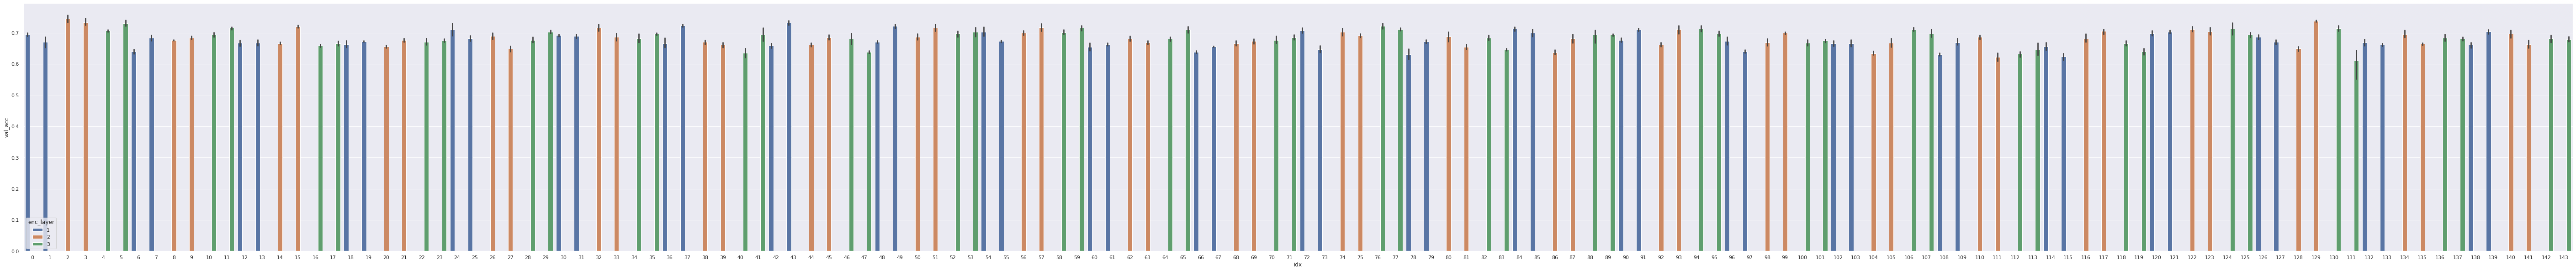

In [6]:
import seaborn as sns
# pd.concat(df_ls,axis=0)
sns.set(rc={'figure.figsize':(100,10)})

sns.barplot(x="idx",y="val_acc",data=pd.concat(df_ls,axis=0),hue="enc_layer")

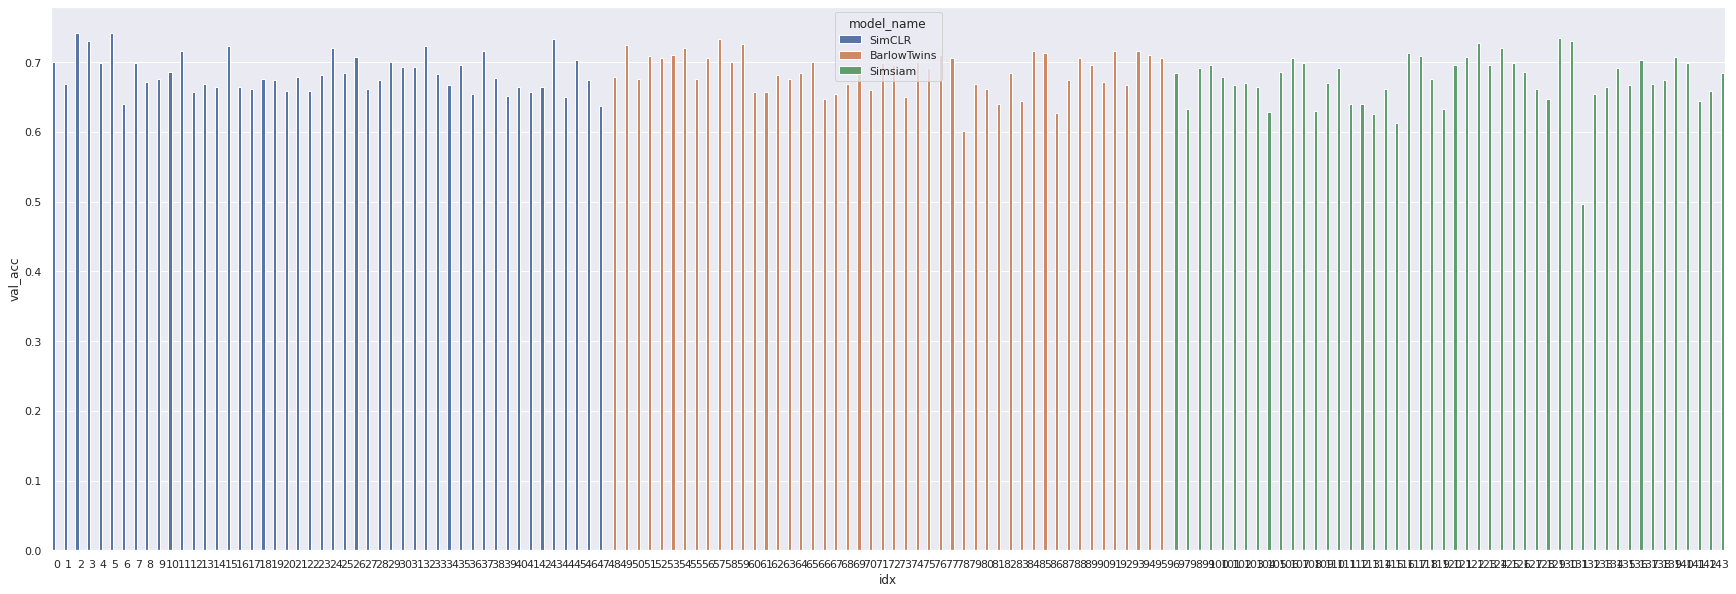

In [ ]:

sns.set(rc={'figure.figsize':(30,10)})
sns.barplot(x="idx",y="val_acc",data=df_ls[0],hue="model_name")

# Cost Time (second)


In [ ]:
np.shape(costtime)

(5, 144)

In [ ]:
timels = np.mean(costtime, axis=0)
np.mean(timels)

5435.499975539579

# Find Best in all record

In [ ]:
import seaborn as sns

In [ ]:
def CalStats(record, adj=0):
    print(np.shape(record))
    print("------------------------------------")
    mean_stat = np.mean(record, axis=0)
    print(mean_stat)
    print("------------------------------------")
    std_stat = np.std(record, axis=0)
    print(std_stat)
    print("------------------------------------")

    print("Mean: ", np.mean(mean_stat))
    max_val = np.max(mean_stat)
    min_val = np.min(mean_stat)
    
    max_idx = np.argmax(mean_stat)
    print("Max Acc: ", max_val)
    print("Min Acc: ", min_val)
    print("Median: ", (max_val+min_val)/2 )
    print("+-: ", max_val-(max_val+min_val)/2)
    
    
    print("Max index: ", max_idx+adj)
    print("------------------------------------")
    print(df.loc[max_idx+adj])
    return mean_stat

(5, 144)
------------------------------------
[0.6941928  0.67052265 0.74470383 0.73324042 0.70619048 0.73025552
 0.63973287 0.68268293 0.67610918 0.68349593 0.69296167 0.71488966
 0.66660859 0.66771196 0.66573751 0.7195935  0.65900116 0.66606272
 0.66319396 0.67193961 0.65565621 0.67544715 0.67038328 0.67442509
 0.70990708 0.68190476 0.6883856  0.64835075 0.67614402 0.70261324
 0.69168409 0.68893148 0.71602787 0.68659698 0.68234611 0.69638792
 0.66511034 0.72261324 0.66960511 0.66139373 0.63543554 0.6939489
 0.65803717 0.73106852 0.66178862 0.68439024 0.68061556 0.63832753
 0.66998839 0.72116144 0.68666667 0.71465738 0.69718931 0.70219512
 0.70260163 0.67335656 0.69910569 0.7168525  0.70140534 0.71574913
 0.65449477 0.66225319 0.68034843 0.66925668 0.68046458 0.7087921
 0.63739837 0.65562137 0.66624855 0.67250871 0.67649245 0.68475029
 0.70696864 0.64615563 0.70162602 0.69062718 0.72102207 0.71034843
 0.63076655 0.67111498 0.68751452 0.65391405 0.68313589 0.64515679
 0.71300813 0.6998

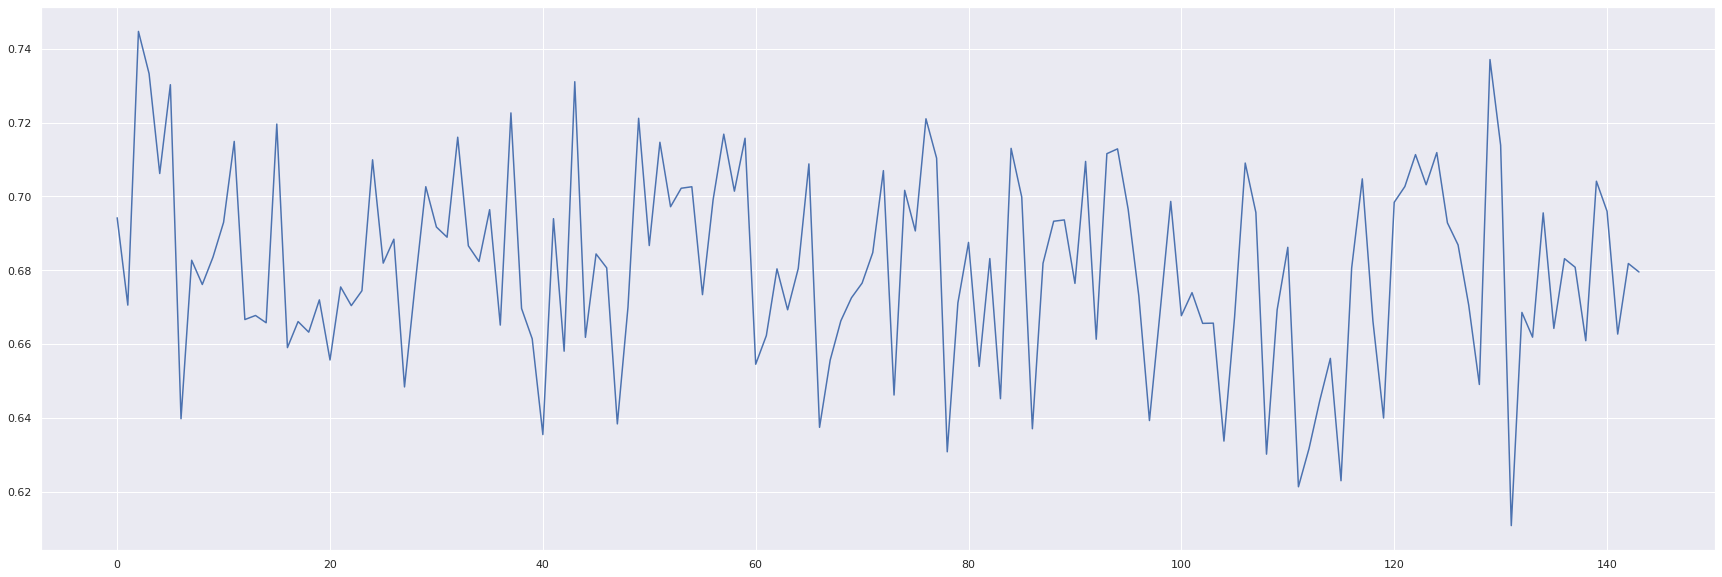

In [ ]:
plt.plot(CalStats(valacc_ls))

# SimCLR

(5, 48)
------------------------------------
[0.6941928  0.67052265 0.74470383 0.73324042 0.70619048 0.73025552
 0.63973287 0.68268293 0.67610918 0.68349593 0.69296167 0.71488966
 0.66660859 0.66771196 0.66573751 0.7195935  0.65900116 0.66606272
 0.66319396 0.67193961 0.65565621 0.67544715 0.67038328 0.67442509
 0.70990708 0.68190476 0.6883856  0.64835075 0.67614402 0.70261324
 0.69168409 0.68893148 0.71602787 0.68659698 0.68234611 0.69638792
 0.66511034 0.72261324 0.66960511 0.66139373 0.63543554 0.6939489
 0.65803717 0.73106852 0.66178862 0.68439024 0.68061556 0.63832753]
------------------------------------
[0.00574578 0.02063094 0.01299596 0.01218852 0.00414776 0.01132371
 0.00800496 0.00959341 0.00234559 0.00637359 0.00778636 0.00491669
 0.01138087 0.01002781 0.00451515 0.00520185 0.00495991 0.00818635
 0.0127987  0.00281069 0.00446431 0.00628493 0.01198159 0.00563575
 0.02297993 0.01036143 0.01235922 0.01057444 0.01037936 0.00641437
 0.00473312 0.00787244 0.01328299 0.01318209 0.

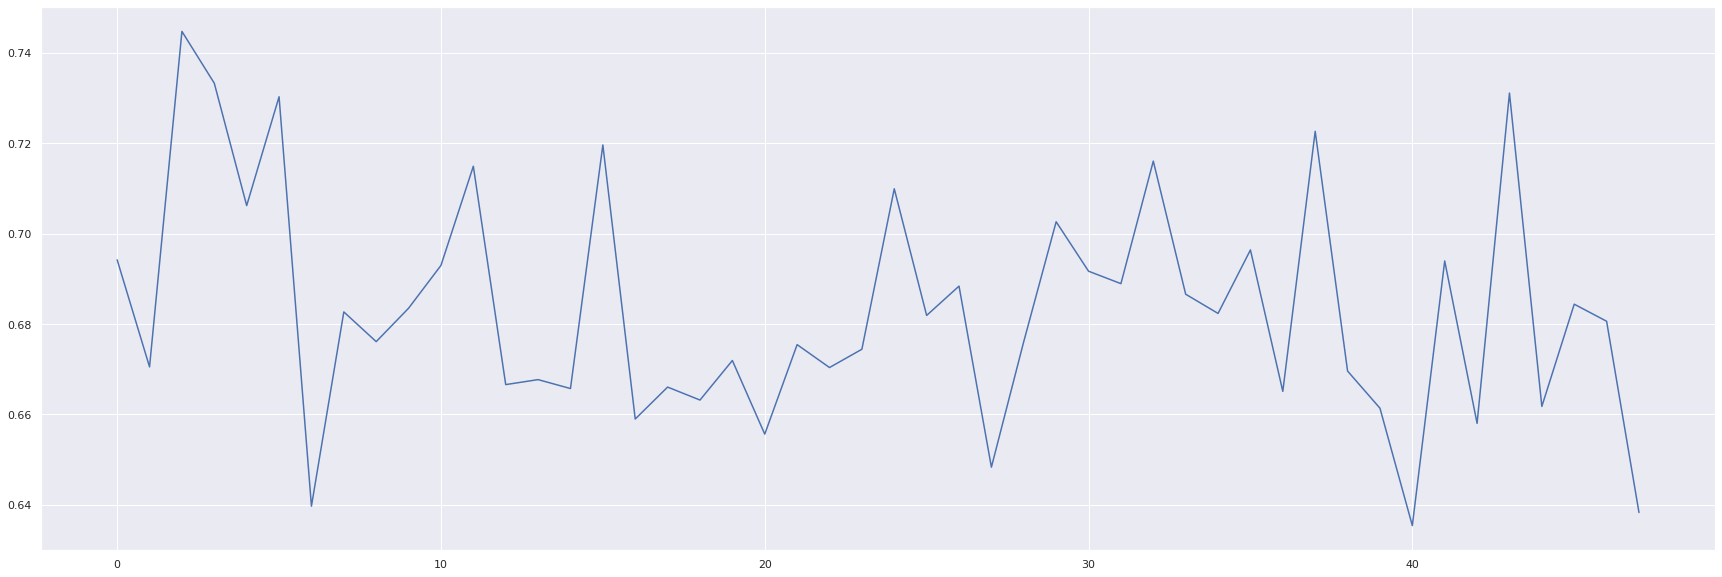

In [ ]:
plt.plot(CalStats(simclr_valacc))

(5, 48)
------------------------------------
[0.66998839 0.72116144 0.68666667 0.71465738 0.69718931 0.70219512
 0.70260163 0.67335656 0.69910569 0.7168525  0.70140534 0.71574913
 0.65449477 0.66225319 0.68034843 0.66925668 0.68046458 0.7087921
 0.63739837 0.65562137 0.66624855 0.67250871 0.67649245 0.68475029
 0.70696864 0.64615563 0.70162602 0.69062718 0.72102207 0.71034843
 0.63076655 0.67111498 0.68751452 0.65391405 0.68313589 0.64515679
 0.71300813 0.69981417 0.6370151  0.68186992 0.69325203 0.69361208
 0.67641115 0.70946574 0.66127758 0.71156794 0.71286876 0.69649245]
------------------------------------
[0.00453146 0.00732137 0.01041855 0.01267975 0.01103946 0.01681994
 0.01658337 0.00473355 0.00860756 0.01356786 0.00835958 0.00858919
 0.01439627 0.00492045 0.00983998 0.00656667 0.00746315 0.01153694
 0.00556183 0.00192617 0.01002548 0.00946916 0.01345419 0.0093408
 0.01005589 0.01208408 0.01377661 0.00641306 0.01051857 0.00505545
 0.01850723 0.00710433 0.01846504 0.00881613 0.0

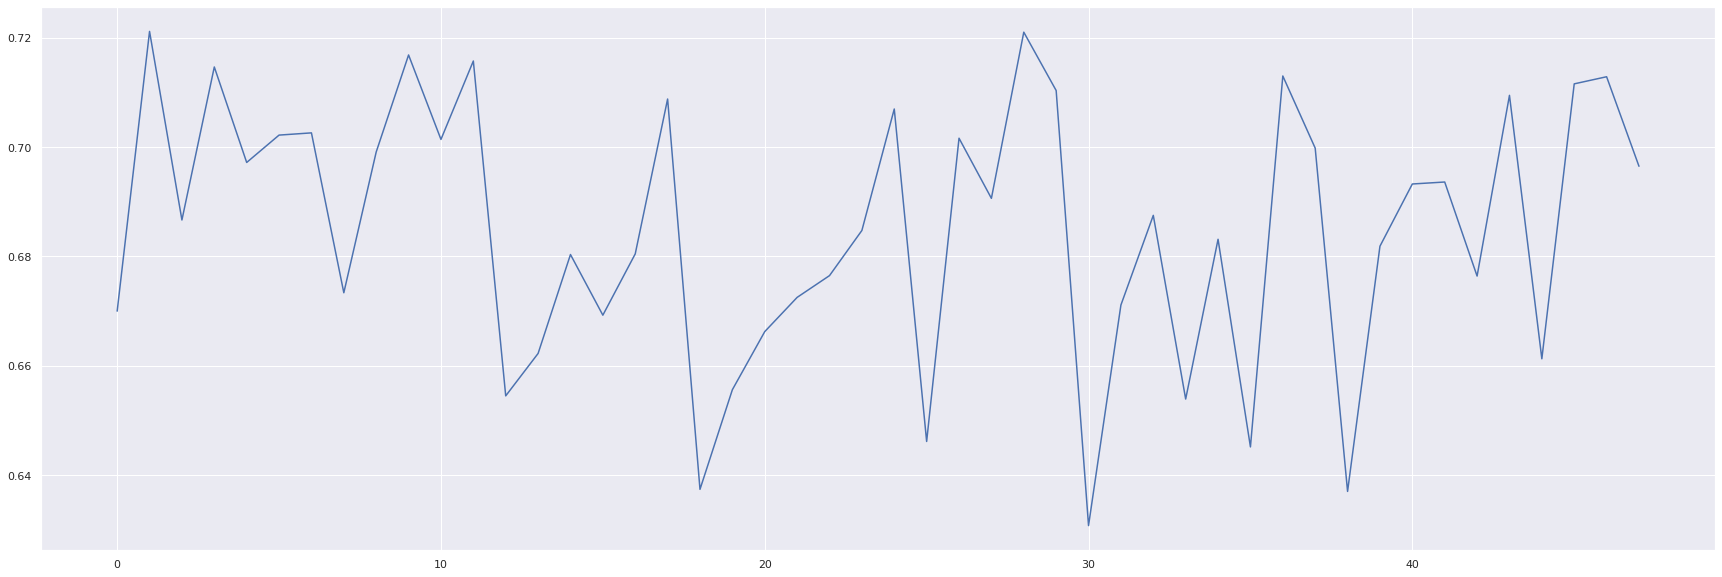

In [ ]:
plt.plot(CalStats(barlowtwins_valacc, 48))

(5, 48)
------------------------------------
[0.67304297 0.63923345 0.66868757 0.6986295  0.66765389 0.67390244
 0.66557491 0.66563298 0.63367015 0.66729384 0.70902439 0.69563298
 0.63012776 0.66925668 0.68619048 0.6212892  0.6316957  0.6445993
 0.65608595 0.62292683 0.68055749 0.70473868 0.66619048 0.63994193
 0.6983856  0.7026597  0.71131243 0.7031475  0.7118583  0.6928223
 0.68684088 0.67052265 0.64901278 0.73707317 0.71385598 0.61076655
 0.66853659 0.66183508 0.69551684 0.66421603 0.68311266 0.68078978
 0.66087108 0.70409988 0.69594657 0.66267131 0.68180023 0.67950058]
------------------------------------
[0.0138452  0.00628409 0.01256812 0.00411609 0.01096193 0.00557232
 0.0101139  0.01234592 0.00727598 0.01489034 0.00696454 0.01429144
 0.00487257 0.01259157 0.00688641 0.01486651 0.01050763 0.02470313
 0.01588451 0.01187753 0.01640081 0.00953008 0.00925569 0.01177464
 0.00949454 0.00626149 0.00969857 0.01381589 0.02355386 0.00872895
 0.00925199 0.00850128 0.00931595 0.00341661 0.0

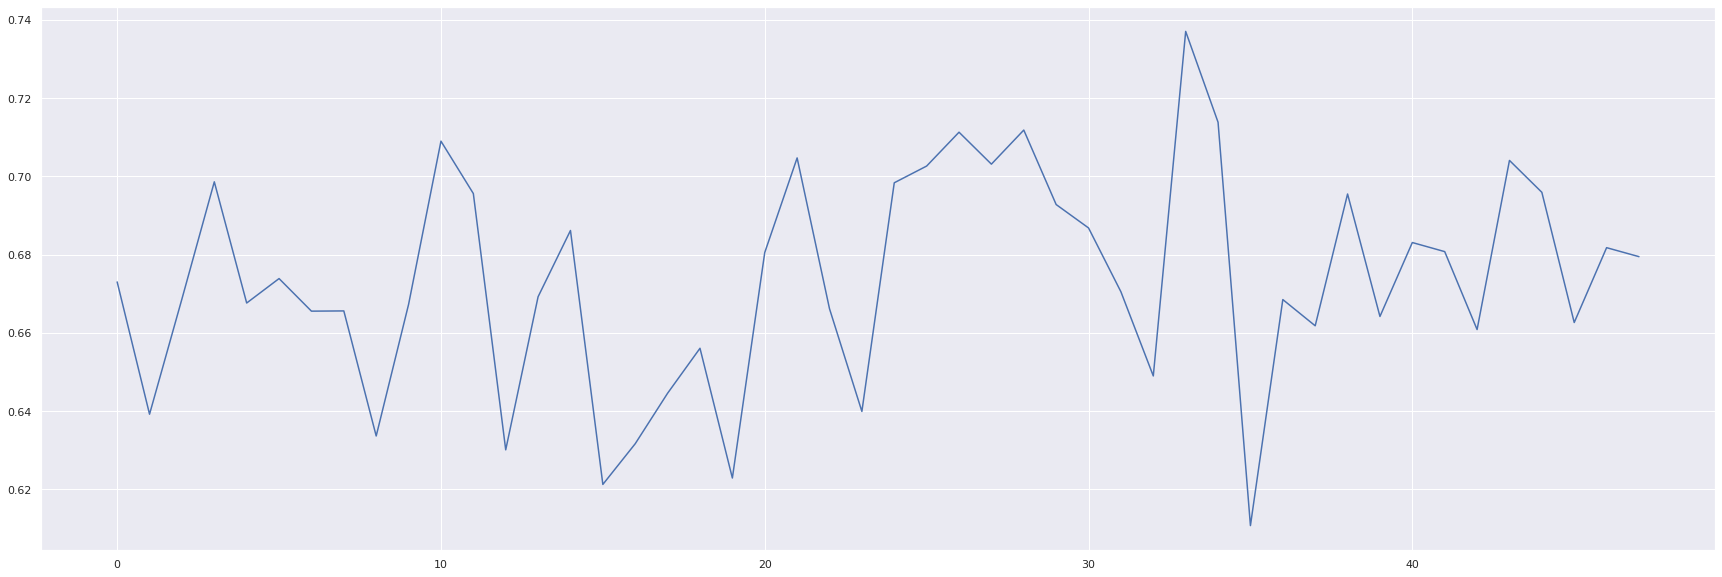

In [ ]:
plt.plot(CalStats(simsiam_valacc, 96))